In [90]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns

#Math packages
import pandas as pd
import numpy as np
import math

#Graph
import networkx as nx

In [79]:
languageDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Language').drop('Languages', axis=1)
leaderDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Leadership').drop('Lead. Styles', axis=1)
learningDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Learning').drop('Learn. Styles', axis=1)
likesDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Like')
dislikesDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Dislikes')

studentDF = languageDF.join(leaderDF).join(learningDF).join(likesDF).join(dislikesDF).drop(['Students'])

In [13]:
def getHistogram(inputDF, metric):
        plt.hist(inputDF[metric].values)
        plt.title(metric)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

In [26]:
def plot_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(15,15))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

In [80]:
#undoing unessecary 1-hot encoding

studentDF['leadershipStyle'] = studentDF.filter(['Amiable','Expressive','Analytical','Driver']).idxmax(1)
studentDF['learningStyle'] = studentDF.filter(['ref-int-vrb-seq','act-int-vrb-seq', 'ref-sns-vrb-seq',
 'act-sns-vrb-seq',
 'ref-int-vis-seq',
 'act-int-vis-seq',
 'ref-sns-vis-seq',
 'act-sns-vis-seq',
 'ref-int-vrb-glo',
 'act-int-vrb-glo',
 'ref-sns-vrb-glo',
 'act-sns-vrb-glo',
 'ref-int-vis-glo',
 'act-int-vis-glo',
 'ref-sns-vis-glo',
 'act-sns-vis-glo']).idxmax(1)
studentDF = studentDF.drop(['Amiable','Expressive','Analytical','Driver','ref-int-vrb-seq','act-int-vrb-seq', 'ref-sns-vrb-seq',
 'act-sns-vrb-seq',
 'ref-int-vis-seq',
 'act-int-vis-seq',
 'ref-sns-vis-seq',
 'act-sns-vis-seq',
 'ref-int-vrb-glo',
 'act-int-vrb-glo',
 'ref-sns-vrb-glo',
 'act-sns-vrb-glo',
 'ref-int-vis-glo',
 'act-int-vis-glo',
 'ref-sns-vis-glo',
 'act-sns-vis-glo'], axis=1)

In [88]:
likeColumn = []
dislikeColumn = []

for i in studentDF.loc[:, 'Student-1Like':'Student-96Like']:
    likeColumn.append(studentDF[i].sum())
    
for i in studentDF.loc[:, 'Student-1Dislikes':'Student-96Dislikes']:
    dislikeColumn.append(studentDF[i].sum())

studentDF['totalLikes'] = likeColumn
studentDF['totalDislikes'] = dislikeColumn
studentDF['likeDelta'] = studentDF['totalLikes'] - studentDF['totalDislikes']
    

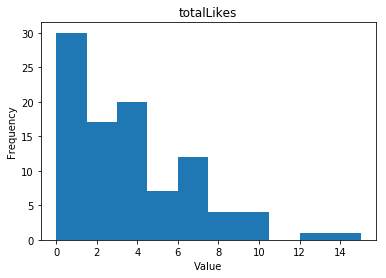

In [144]:
getHistogram(studentDF, 'totalLikes')

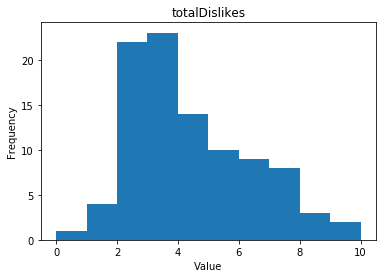

In [87]:
getHistogram(studentDF, 'totalDislikes')

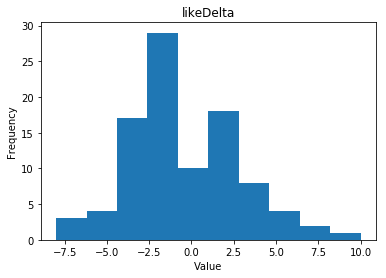

In [89]:
getHistogram(studentDF, 'likeDelta')

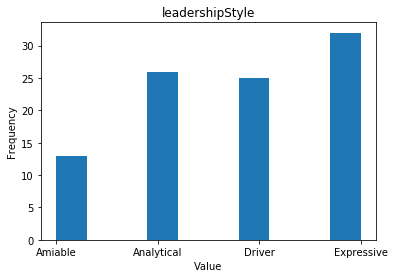

In [145]:
getHistogram(studentDF, 'leadershipStyle')

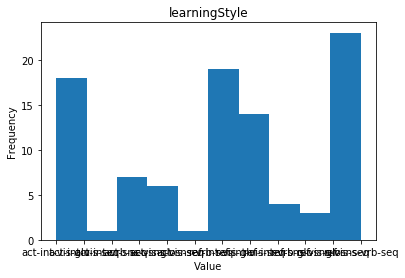

In [146]:
getHistogram(studentDF, 'learningStyle')

In [139]:
# Graph time! (this is student likes)
L = nx.DiGraph()
L.add_nodes_from(studentDF.index.values)

for i in studentDF.loc[:, 'Student-1Like':'Student-96Like']:
    for j in studentDF.index:
        if(studentDF.loc[j][i] == 1):
            L.add_edge(j, i[:-4])

In [140]:
# Graph time! (this is student dislikes)
D = nx.DiGraph()
D.add_nodes_from(studentDF.index.values)

for i in studentDF.loc[:, 'Student-1Dislikes':'Student-96Dislikes']:
    for j in studentDF.index:
        if(studentDF.loc[j][i] == 1):
            D.add_edge(j, i[:-4])

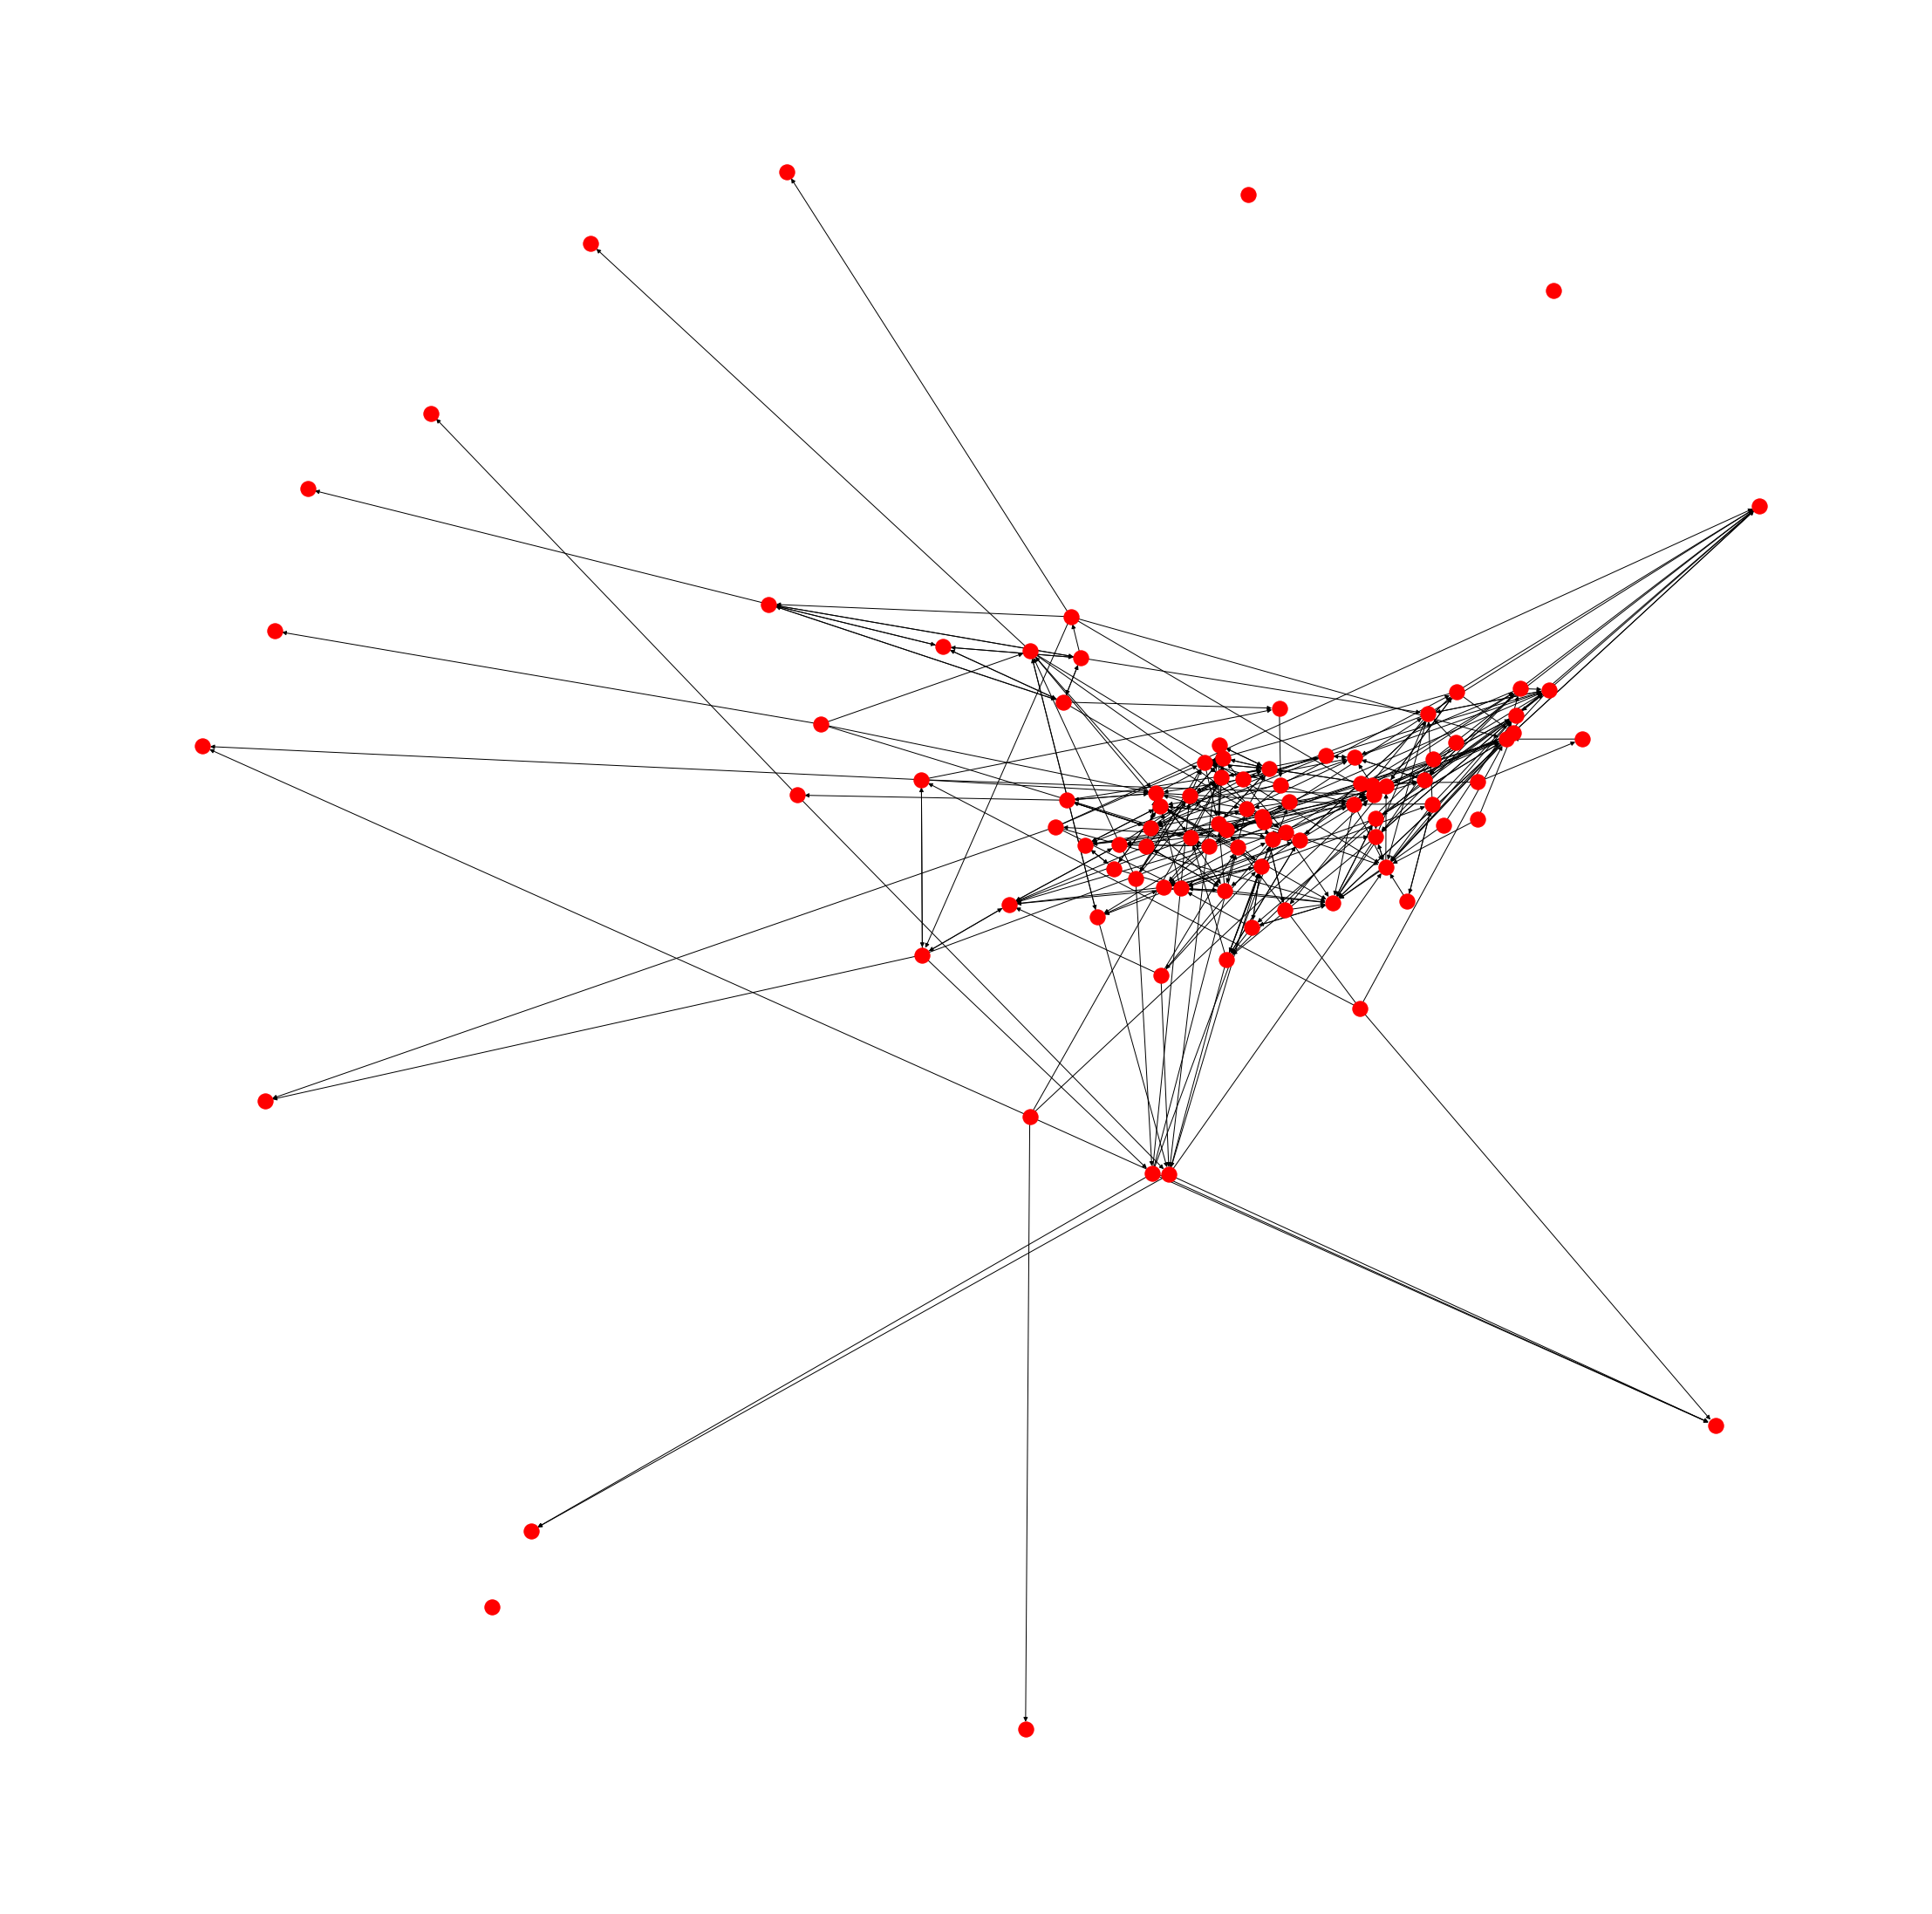

In [141]:
plt.figure(3, figsize=(30,30))
nx.draw(L, with_labels=False)

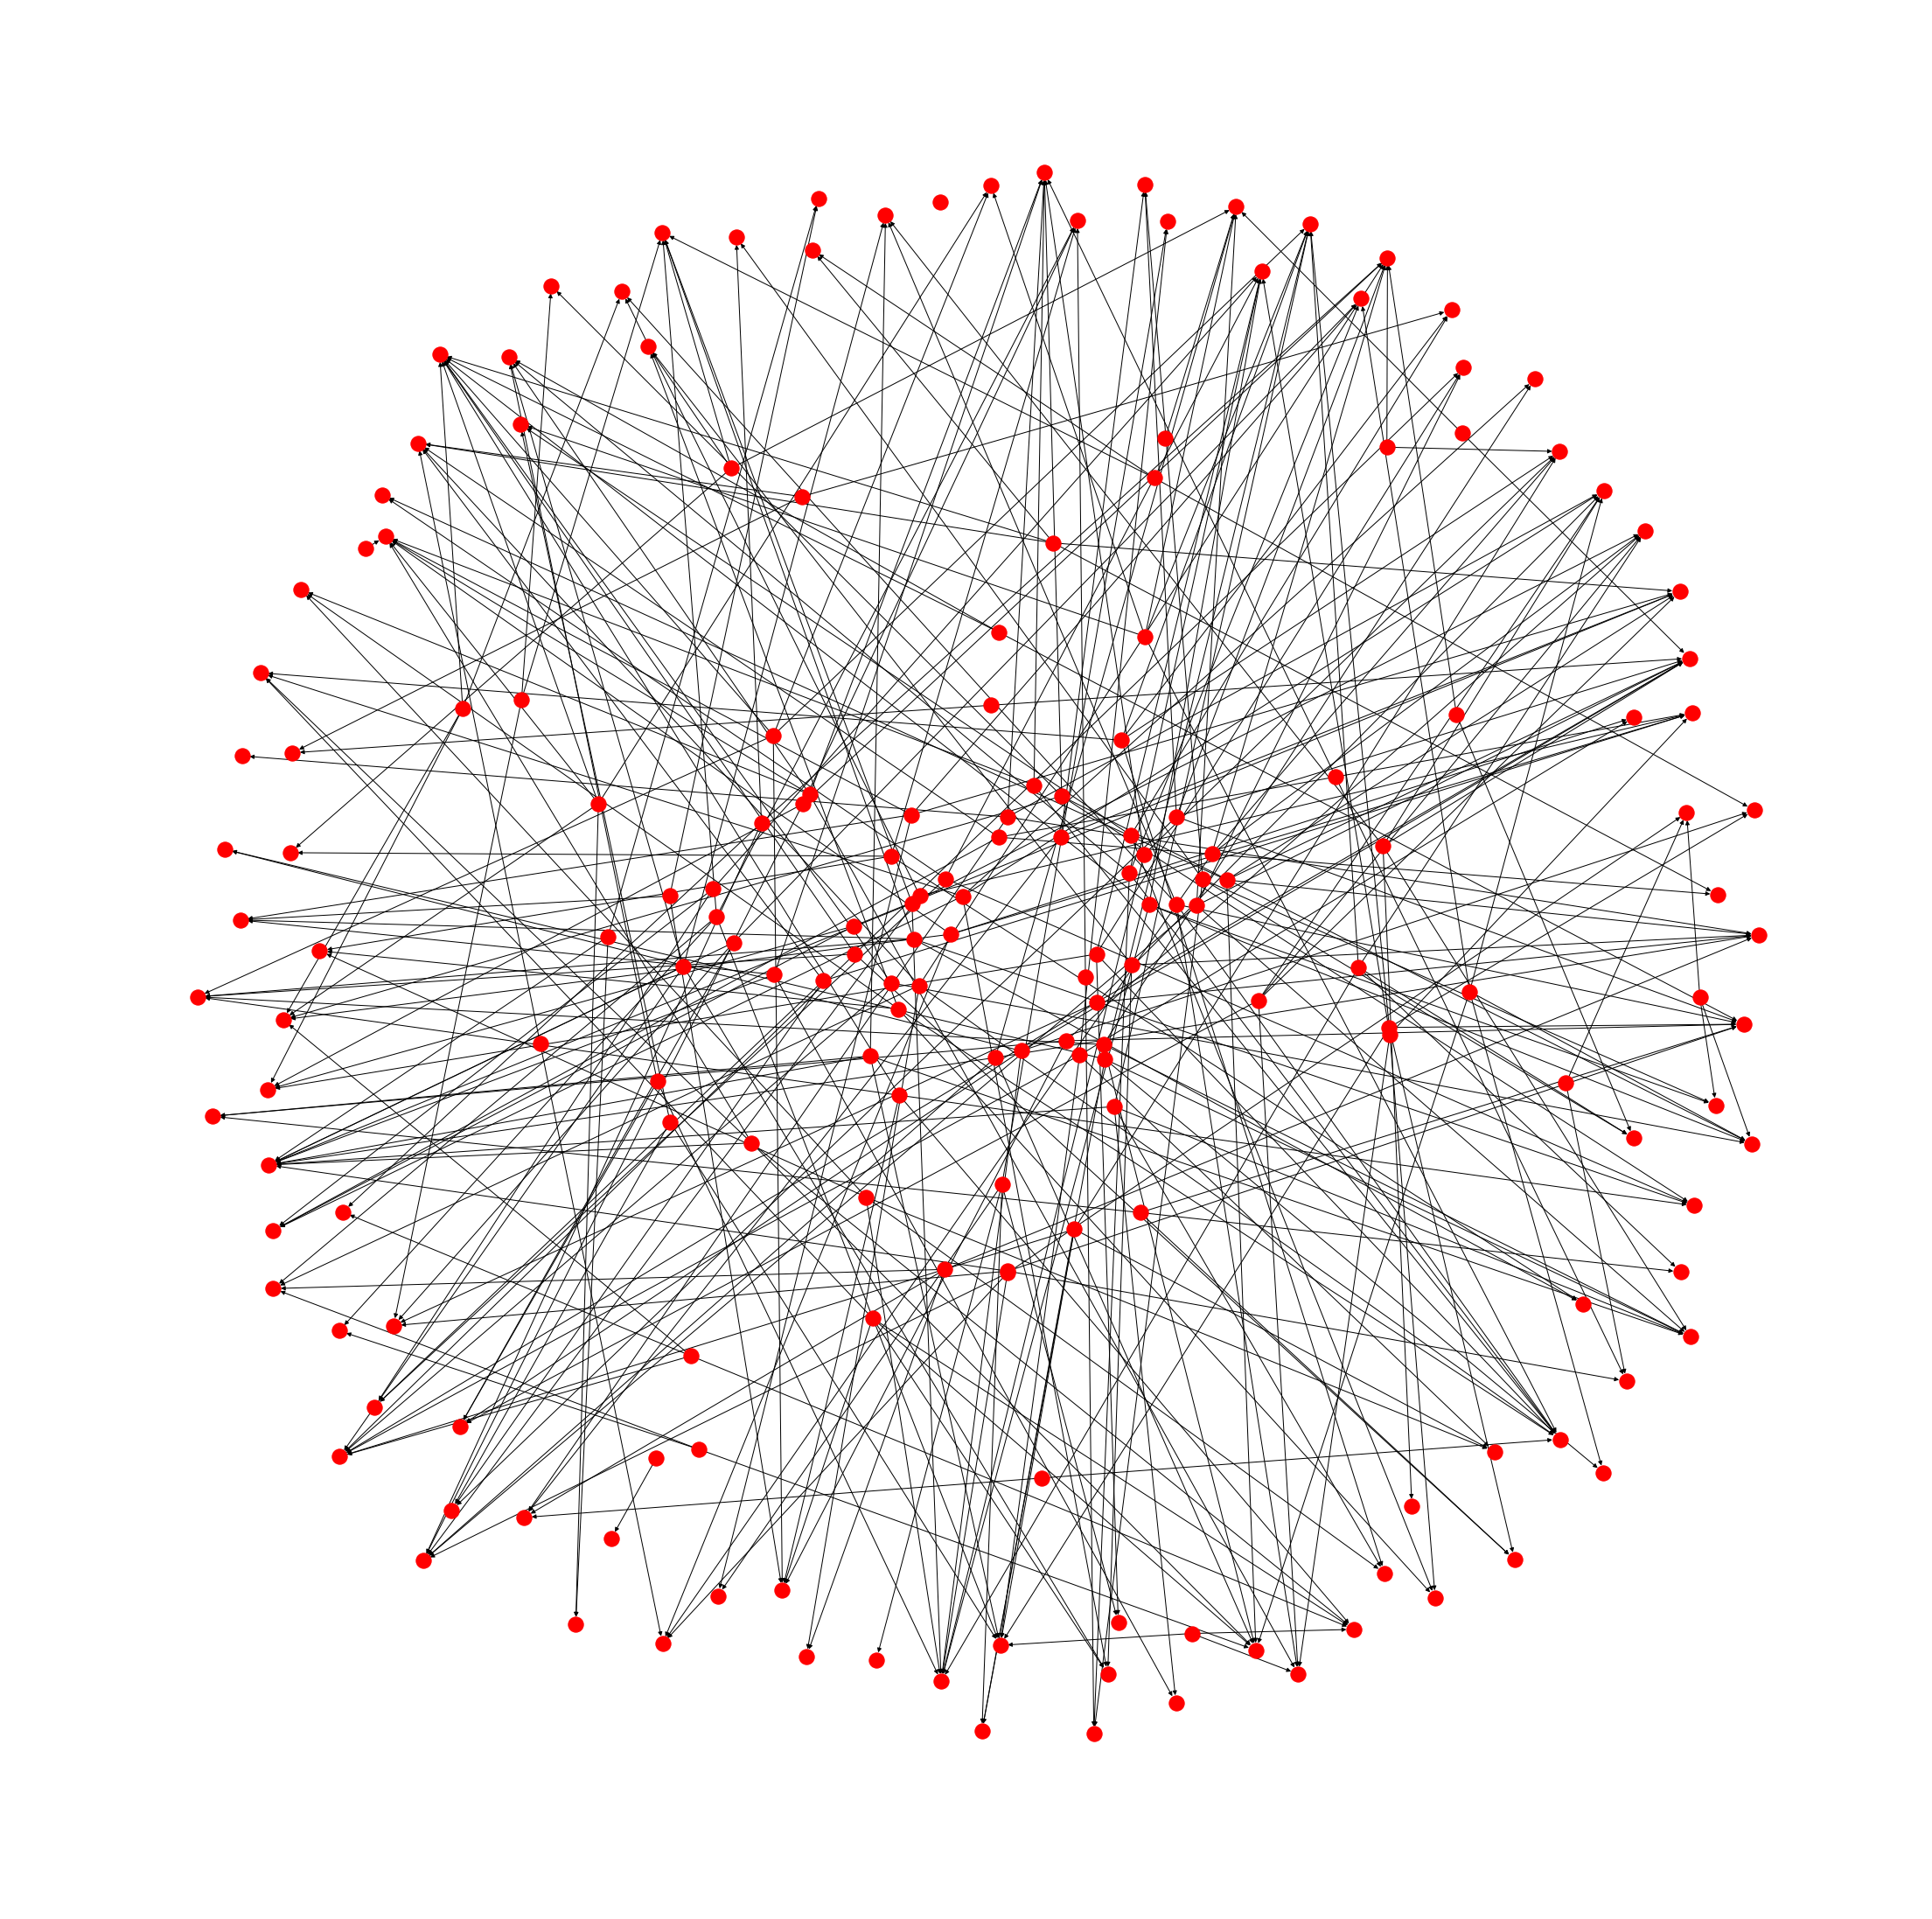

In [142]:
plt.figure(3, figsize=(30,30))
nx.draw(D, with_labels=False)